<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Image/Test_Stitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install opencv-python

In [23]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [24]:
image_set_dir = "C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\"
image_set_prefix = 'Test_Neuron1'

os.chdir(image_set_dir)

tif_list=list()
for dir,root,files in os.walk(image_set_dir):
    for f in files:
        if 'CH4.tif' in f:
            tif_list.append(os.path.join(dir,f))


In [25]:
pd_dict = {'file_loc': [t for t in tif_list],
           'xy': [t.split("_")[-3] for t in tif_list],
           'z': [t.split("_")[-2] for t in tif_list]}
image_df = pd.DataFrame(pd_dict)

display(image_df)


,file_loc,xy,z
0,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z001
1,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z002
2,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z003
3,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z004
4,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z005
...,...,...,...
2845,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z110
2846,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z111
2847,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z112
2848,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z113


['Z001', 'Z002', 'Z003', 'Z004', 'Z005', 'Z006', 'Z007', 'Z008', 'Z009', 'Z010', 'Z011', 'Z012', 'Z013', 'Z014', 'Z015', 'Z016', 'Z017', 'Z018', 'Z019', 'Z020', 'Z021', 'Z022', 'Z023', 'Z024', 'Z025', 'Z026', 'Z027', 'Z028', 'Z029', 'Z030', 'Z031', 'Z032', 'Z033', 'Z034', 'Z035', 'Z036', 'Z037', 'Z038', 'Z039', 'Z040', 'Z041', 'Z042', 'Z043', 'Z044', 'Z045', 'Z046', 'Z047', 'Z048', 'Z049', 'Z050', 'Z051', 'Z052', 'Z053', 'Z054', 'Z055', 'Z056', 'Z057', 'Z058', 'Z059', 'Z060', 'Z061', 'Z062', 'Z063', 'Z064', 'Z065', 'Z066', 'Z067', 'Z068', 'Z069', 'Z070', 'Z071', 'Z072', 'Z073', 'Z074', 'Z075', 'Z076', 'Z077', 'Z078', 'Z079', 'Z080', 'Z081', 'Z082', 'Z083', 'Z084', 'Z085', 'Z086', 'Z087', 'Z088', 'Z089', 'Z090', 'Z091', 'Z092', 'Z093', 'Z094', 'Z095', 'Z096', 'Z097', 'Z098', 'Z099', 'Z100', 'Z101', 'Z102', 'Z103', 'Z104', 'Z105', 'Z106', 'Z107', 'Z108', 'Z109', 'Z110', 'Z111', 'Z112', 'Z113', 'Z114']


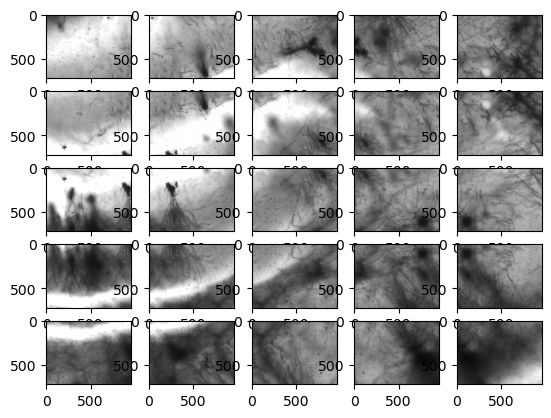

In [43]:
z_planes = sorted(list(set(image_df['z'])))
print(z_planes)

for cur_z in [z_planes[15]]:
    single_plane_images = image_df['file_loc'][[cur_z in z for z in image_df['z']]].values
image_data_list = list()
for path in single_plane_images:
    image_data =cv2.imread(path)
    image_data_list.append(image_data)
order = np.array(list(range(0,5,1)) + list(range(9,4,-1)) + list(range(10,15,1)) + list(range(19,14,-1)) + list(range(20,25,1)))
image_data_list_sorted = [image_data_list[o] for o in order]

fig,ax=plt.subplots(5,5)
ax = ax.flatten()
for i,f in enumerate(image_data_list_sorted):
    ax[i].imshow(f)

In [30]:
def get_square(ind,d=5):
    if (ind+1)%d < 1:
        return None
    if  d**2 < ind+d+1:
        return None
    else:
        ind_01 = ind+d
        ind_10 = ind+1
        ind_11 = ind+1+d
    return [ind,ind_01,ind_10,ind_11]

In [137]:
stitcher = cv2.Stitcher_create(mode=1)
(status, stitched_full) = stitcher.stitch(image_data_list_sorted)
plt.imshow(stitched_full)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\umatrix.cpp:710: error: (-215:Assertion failed) u != 0 in function 'cv::UMat::create'


In [45]:
##
image1 = image_data_list_sorted[2]
image2 = image_data_list_sorted[3]

In [52]:
def mpl_draw_keypoints(keypoints,img,ax=None):
    if ax is None:
        fig,ax=plt.subplots(1)
    ax.imshow(img)
    for k in keypoints:
        ax.scatter(k.pt[0],k.pt[1],s=1,color='c')
    return None

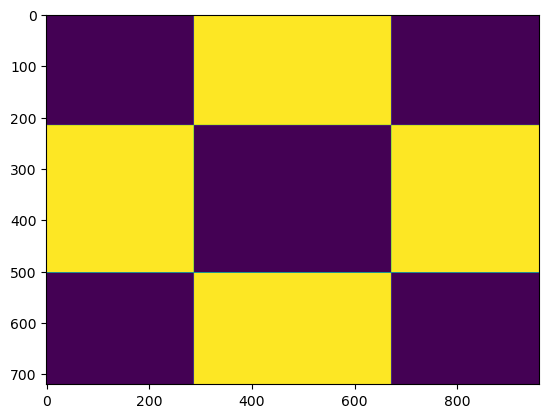

In [101]:

def plus_mask(img,n):
    mask = np.zeros_like(img[:,:,0])
    m_shape = np.shape(mask)
    mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),:] = 1
    mask[:,int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 1
    mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 0
    return mask

mask = plus_mask(image1,.3)
plt.imshow(mask)

In [185]:
stitcher.setMatchingMask(mask)


AttributeError: 'cv2.Stitcher' object has no attribute 'setMatchingMask'

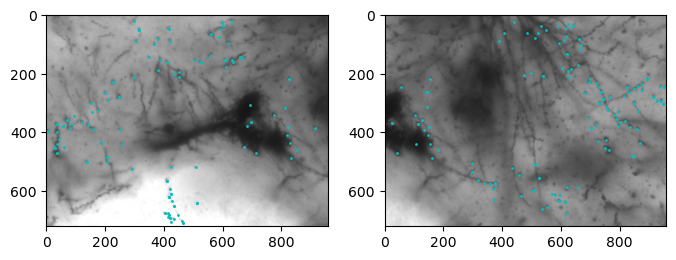

In [102]:
# Initialize the SIFT feature detector and extractor
sift = cv2.SIFT_create( )

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(image1, mask)
keypoints2, descriptors2 = sift.detectAndCompute(image2, mask)


fig,ax=plt.subplots(1,2,figsize=(8,4))
mpl_draw_keypoints(keypoints1,image1,ax[0])
mpl_draw_keypoints(keypoints2,image2,ax[1])





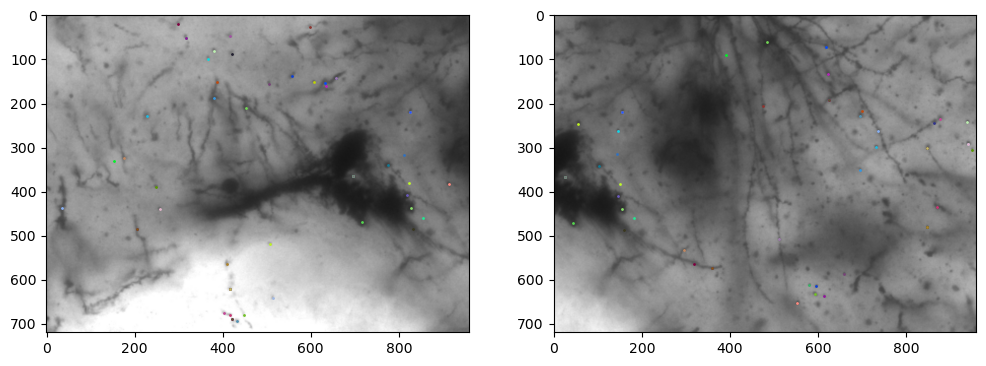

In [123]:
# Initialize the feature matcher using brute-force matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match the descriptors using brute-force matching
matches = bf.match(descriptors1, descriptors2)
num_matches = 50
matches = sorted(matches, key=lambda x: x.distance)[:num_matches]
# Extract matching keypoints
src_points = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)


fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(image1)
ax[1].imshow(image2)
for s,d in zip(src_points,dst_points):
    rand_color = np.random.rand(3)
    ax[0].scatter(s[0][0],s[0][1],s=1,color=rand_color)
    ax[1].scatter(d[0][0],d[0][1],s=1,color=rand_color)

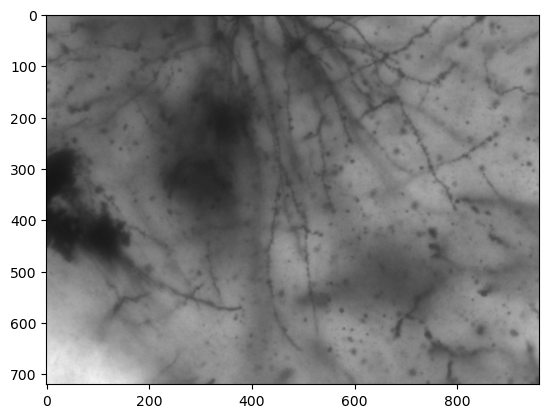

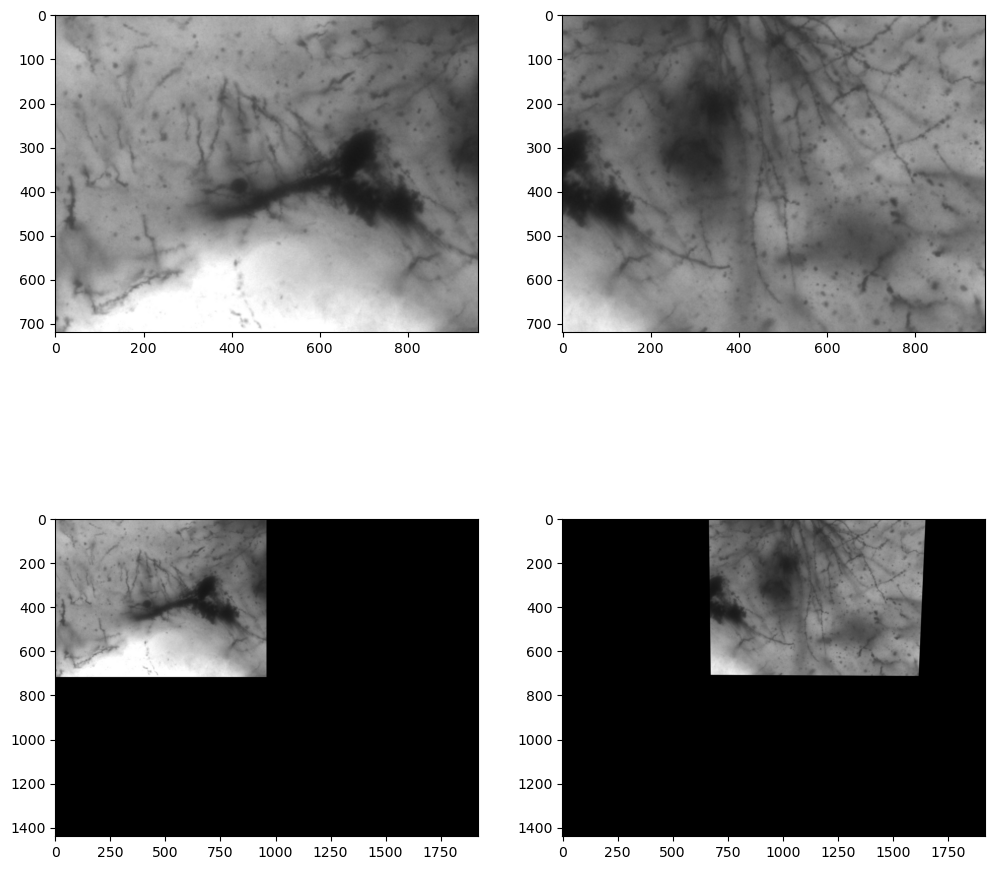

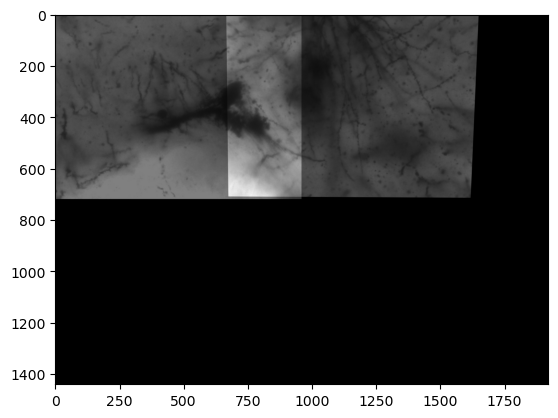

In [183]:
# Estimate the homography matrix
homography_null, _ = cv2.findHomography(dst_points, dst_points, cv2.RANSAC, 5.0)
homography_inv, _ = cv2.findHomography(dst_points, src_points, cv2.RANSAC, 5.0)

# Warp the first image using the homography
result1 = cv2.warpPerspective(image1, homography_null, (image1.shape[1]+image2.shape[1], image2.shape[0]+image2.shape[0]))
result2 = cv2.warpPerspective(image2, homography_inv,(image1.shape[1]+image2.shape[1], image2.shape[0]+image2.shape[0]))

fig,ax=plt.subplots(2,2,figsize=(12,12))
ax[0,0].imshow(image1)
ax[0,1].imshow(image2)
ax[1,0].imshow(result1)
ax[1,1].imshow(result2)
plt.show()
# Blending the warped image with the second image using alpha blending
alpha = 0.5  # blending factor
blended_image = cv2.addWeighted(result1, alpha, result2, 1 - alpha, 0)

plt.imshow(blended_image)
plt.show()

In [155]:
image2.shape[1]
image2.shape[0]

720